<a href="https://colab.research.google.com/github/SUMITYADAV96/CAPSTONE_PROJECT-HOTEL-BOOKING-ANALYSIS/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

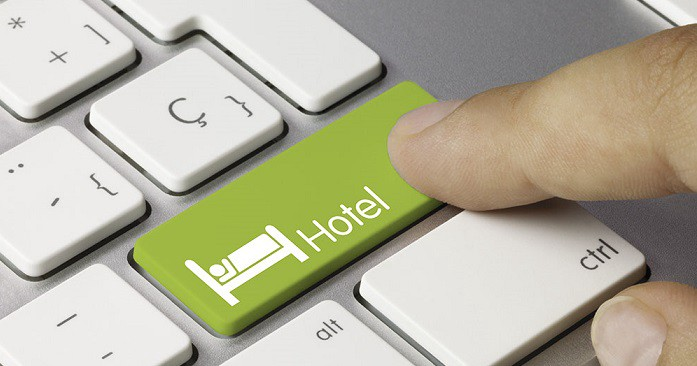

##DATA SUMMARY

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from folium.plugins import HeatMap
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [145]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

# Defining path
path = '/content/drive/MyDrive/capstone project /Hotel Bookings (1).csv'

# Importing dataset to create a dataframe
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
 # To view top 5 entries in the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [147]:
# To view top 5 last entries in the datasets 
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [148]:
#Use info() function to print full summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [149]:
# Now, we let us see all the column names
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [150]:
#Statistical summary of data frame
df.describe(percentiles =[0.10,0.75,0.90,0.99], include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
10%,NaN,0.000000,3.000000,2015.000000,NaN,8.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,6.000000,40.000000,0.000000,NaN,50.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


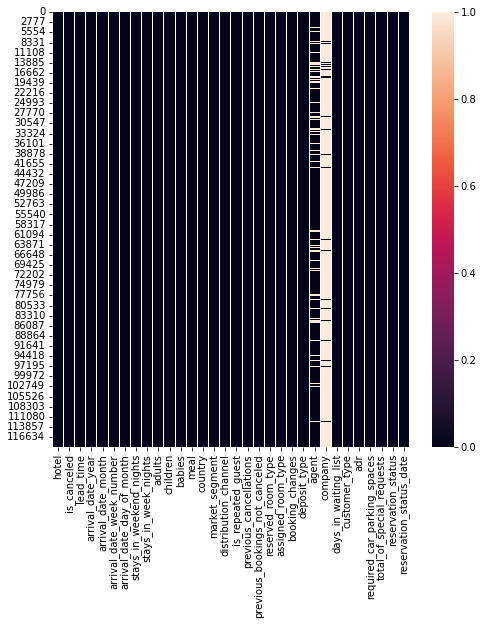

In [151]:
 #checking the null values
 plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(), cbar=True )

In [152]:
# lets try to find out percentage of null values present in columns
def percent_null_values(df):
  nan_percent = (df.isnull().sum()/len(df))*100
  nan_percent = nan_percent[nan_percent>0].sort_values(ascending=False)
  return nan_percent
percent_null_values(df)

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64

company column having the most number of null values (94%)

In [153]:
#number of unique values for each variable
df.nunique(axis=0)

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [154]:
# checking the numeric features in the datasets 
df.select_dtypes(include=np.number)
df.select_dtypes(include=np.number).columns.tolist()

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

##DATA CLEANING AND PREPARATION


In [155]:
# chechking the hotel column unique values in it.
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [156]:
# Show no. of rows of duplicate rows duplicate rows
df[df.duplicated()].shape

(31994, 32)

In [157]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)

In [158]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [159]:
# rest with three columns having nan values 
df[["country","agent","company"]].isnull().sum()

country      452
agent      12193
company    82137
dtype: int64

In [160]:
df1 = df.copy()

In [161]:
# dropping the company column having 94% of the missing values 
df1 = df.drop(columns = ['company'])

In [162]:
df1 = df1.dropna(axis = 0)

In [163]:
# checking the shape of df after dropping the company column 
df1.shape

(75074, 31)

In [164]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

In [165]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,2,2.0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,3,2.0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22,3,2.0


In [166]:
col =df1.columns
print(list(col))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'total_stay', 'total_people']


In [167]:
outlier_columns = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children',
                  'babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr',
                  'required_car_parking_spaces','total_stay','total_people']

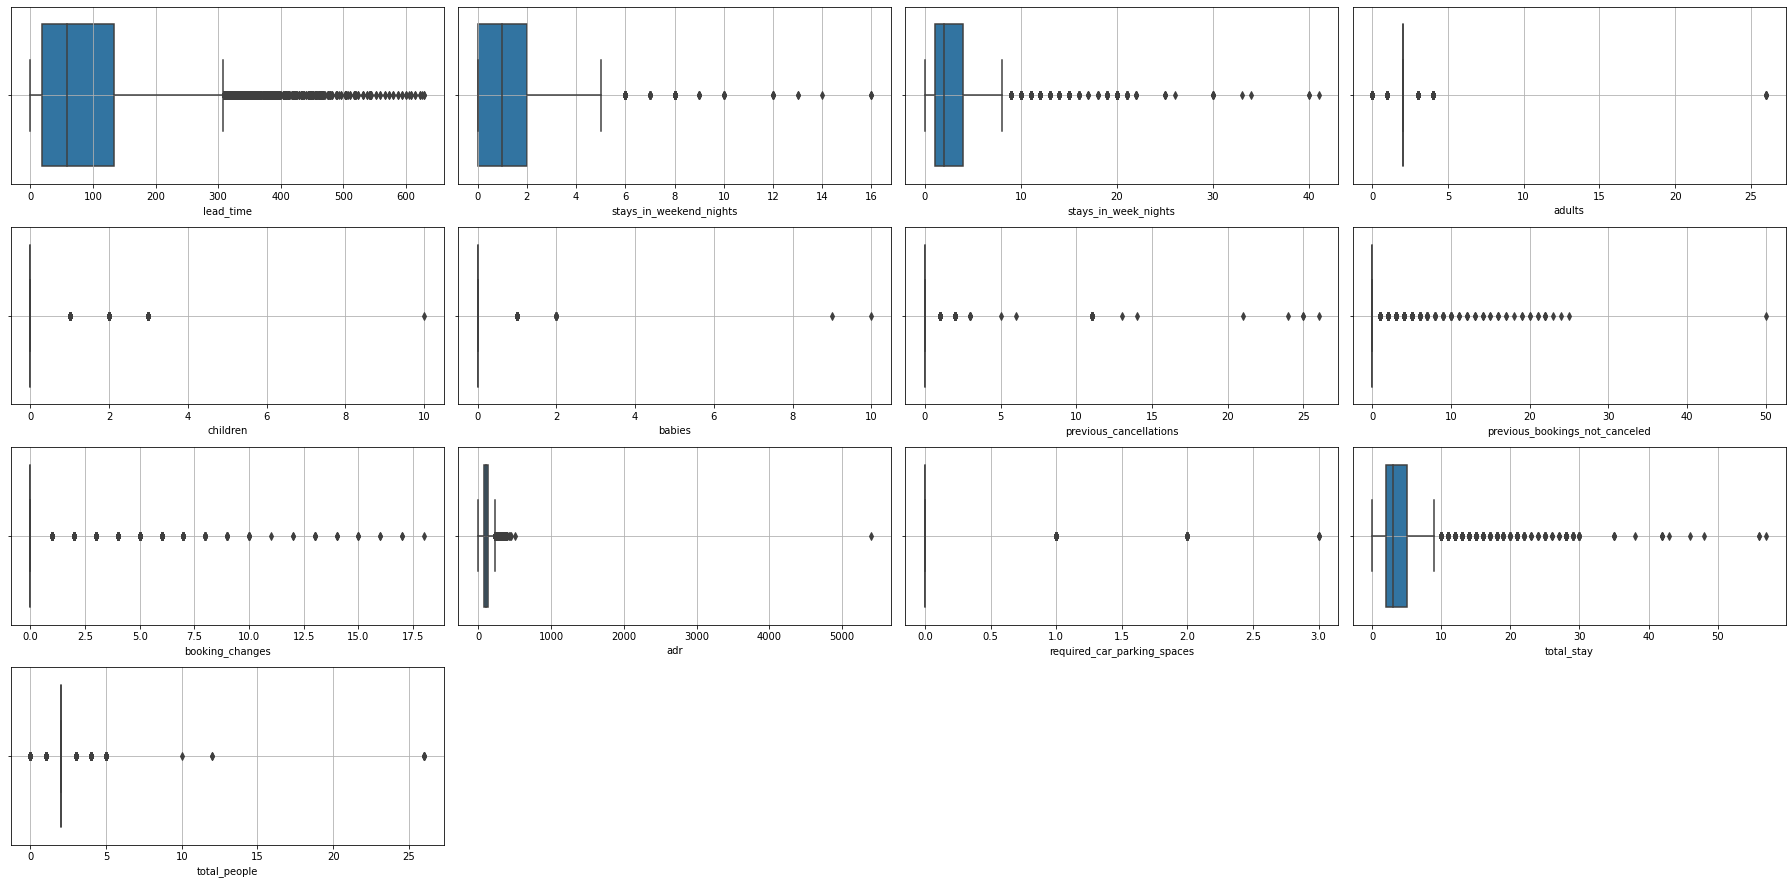

In [168]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
n = 1
plt.figure(figsize=(25,15))
for column in outlier_columns:
  plt.subplot(5, 4, n)
  n = n+1
  sns.boxplot(df1[column])
  plt.grid()
  plt.tight_layout()


In [169]:
# droping the outlier from adr column 
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

In [170]:
df1["adr"].max()

510.0

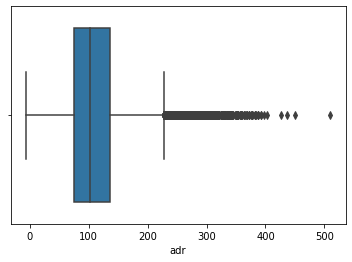

In [171]:
#visualizing the adr col after removing the outlier 
sns.boxplot(df1["adr"])

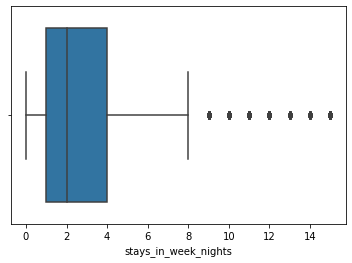

In [172]:
df1.stays_in_week_nights.loc[df1.stays_in_week_nights >15 ]=15
sns.boxplot(df1["stays_in_week_nights"])

In [173]:
# checking the values of weekend nights column by quantile range between (10-99.9%)
print(df1["stays_in_weekend_nights"].quantile(0.10)) , print(df1["stays_in_weekend_nights"].quantile(0.999)) 

0.0
7.0


(None, None)

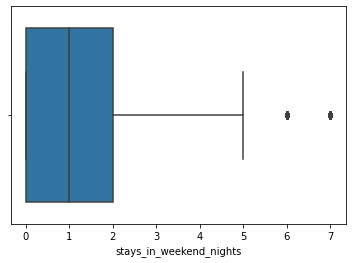

In [174]:
# removing the outlier by giving threshold based on own understanding
df1.loc[df1.stays_in_weekend_nights > 7,'stays_in_weekend_nights'] = 7
sns.boxplot(df1["stays_in_weekend_nights"])

##EDA

overview of the number of people who booked the hotel

([<matplotlib.patches.Wedge at 0x7f5fb4ed4d10>,
 [Text(-0.9994202576533577, -0.45952056384028817, 'City Hotel'),
  Text(1.0902766916473892, 0.5012950584739728, 'Resort Hotel')],
 [Text(-0.5451383223563768, -0.2506475802765208, '63.7%'),
  Text(0.6359947367943104, 0.2924221174431508, '36.3%')])

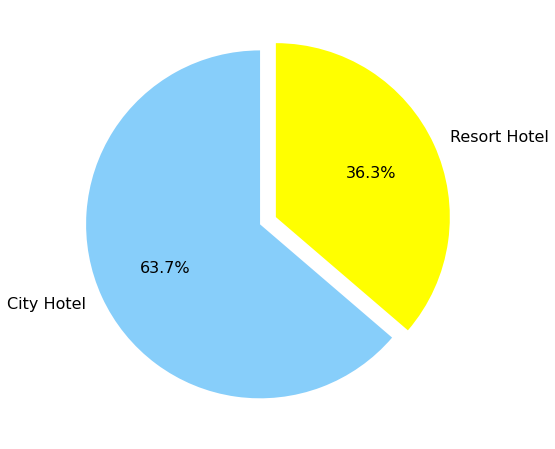

In [175]:
##overview of the number of people who booked the hotel

# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df1['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df1['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['lightskyblue','yellow']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 16})

checking the number of guests(adults, children,total_stays) arrival based on hotel

In [176]:
# Looking into adult. 
# Using groupby to group according to hotel types only.
df1['adults'].groupby(df1['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,47835.0,1.924135,0.520028,0.0,2.0,2.0,2.0,4.0
Resort Hotel,27238.0,1.925362,0.517323,0.0,2.0,2.0,2.0,26.0


In [177]:
# Looking into children. 
# Using groupby to group according to hotel types only.
df1['children'].groupby(df1['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,47835.0,0.137786,0.450754,0.0,0.0,0.0,0.0,3.0
Resort Hotel,27238.0,0.168404,0.505306,0.0,0.0,0.0,0.0,10.0


In [178]:
# Looking into children. 
# Using groupby to group according to hotel types only.
df1['total_stay'].groupby(df1['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,47835.0,3.264388,2.045022,0.0,2.0,3.0,4.0,57.0
Resort Hotel,27238.0,4.799104,3.440165,0.0,2.0,4.0,7.0,56.0


How much adr is varying according to the arrival month and hotel type

In [179]:
data_resort = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)]
data_city = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)]

In [180]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,80.244533
1,August,181.885370
2,December,60.141221
3,February,55.890470
4,January,50.521993
5,July,151.239070
6,June,109.801673
7,March,59.221469
8,May,80.087191
9,November,50.000075


In [181]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,115.961242
1,August,125.652976
2,December,92.709924
3,February,90.310457
4,January,86.065430
5,July,122.452266
6,June,123.294580
7,March,92.539954
8,May,127.750621
9,November,90.850401


In [182]:
including_hotels = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
including_hotels.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
including_hotels

,month,price_for_resort,price_for_city_hotel
0,April,80.244533,115.961242
1,August,181.885370,125.652976
2,December,60.141221,92.709924
3,February,55.890470,90.310457
4,January,50.521993,86.065430
5,July,151.239070,122.452266
6,June,109.801673,123.294580
7,March,59.221469,92.539954
8,May,80.087191,127.750621
9,November,50.000075,90.850401


In [183]:
# sorting the values according to months 
room_prices_mothly = df1[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")
# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

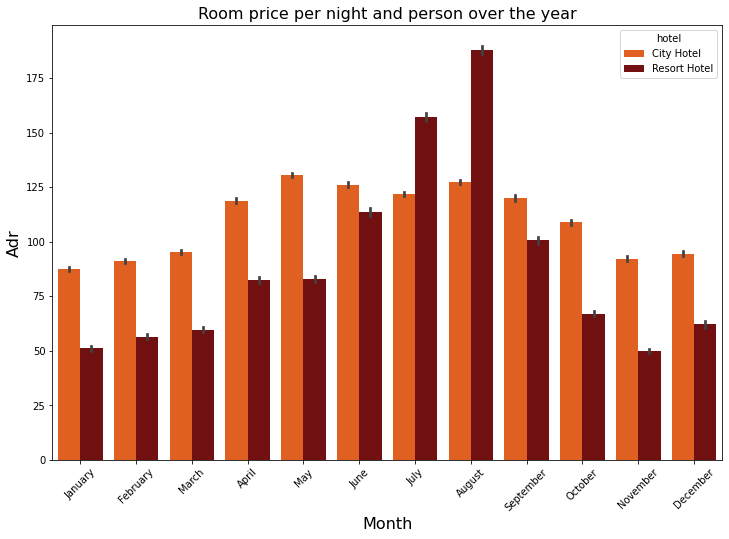

In [184]:
plt.figure(figsize=(12, 8))
ax= sns.barplot(x = "arrival_date_month", y="adr", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], palette="gist_heat_r")
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Adr", fontsize=16)
plt.show()


How long do people stay at the hotels

In [185]:
# filtering the data 
filter = df1['is_canceled'] == 0
data = df1[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,2,2.0
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0,Transient,145.0,0,0,Check-Out,2015-07-05,4,2.0
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,0,Transient,97.0,0,3,Check-Out,2015-07-05,4,2.0


In [186]:
# Adding the weekend and week nights column  
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,total_nights
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,2,2.0,2
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0,Transient,145.0,0,0,Check-Out,2015-07-05,4,2.0,4
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,0,Transient,97.0,0,3,Check-Out,2015-07-05,4,2.0,4


In [187]:
# 
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, 0:3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay.head()

,total_nights,hotel,Number of stays
0,0,City Hotel,195
1,0,Resort Hotel,240
2,1,City Hotel,5642
3,1,Resort Hotel,3366
4,2,City Hotel,6490


In [188]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark' )

Agent makes most no. of bookings

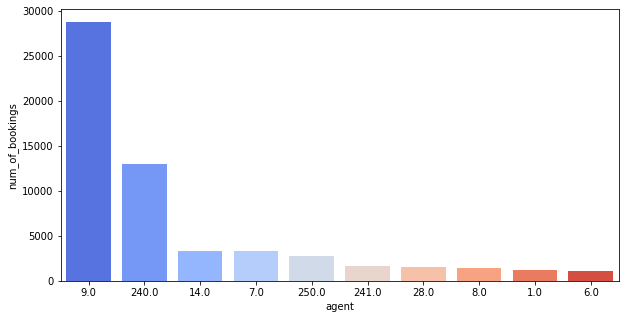

In [189]:
d1 = pd.DataFrame(df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent,dodge="float",saturation=8,palette="coolwarm")

Agent no. 9 has made most no. of bookings

Room type is in most demand and which room type generatest highest adr

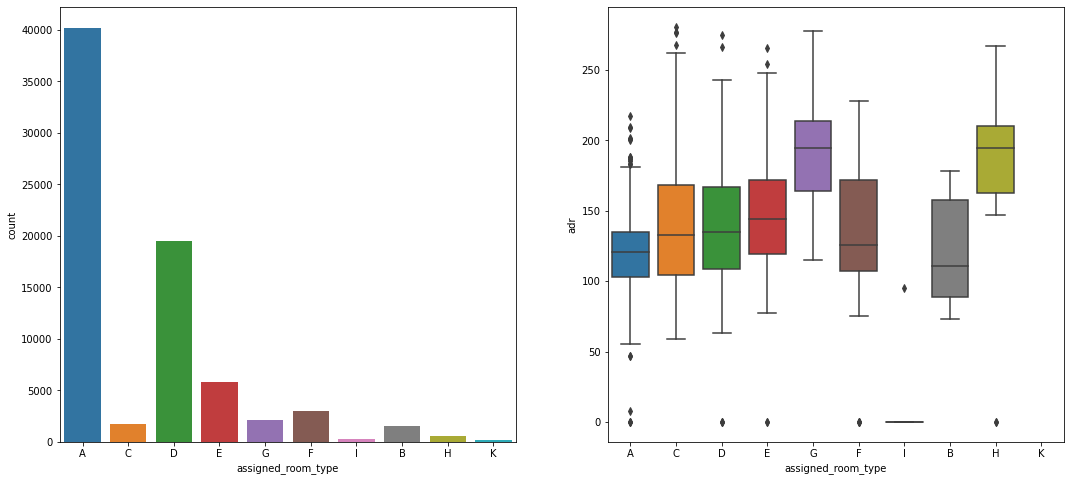

In [190]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df1.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df1['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df1['assigned_room_type'], y = df1[0:1000]['adr'] )

plt.show()

which meal type is most preffered meal of customers

BB           56825
SC            9190
HB            8401
Undefined      360
FB             297
Name: meal, dtype: int64
BB           0.756930
SC           0.122414
HB           0.111904
Undefined    0.004795
FB           0.003956
Name: meal, dtype: float64


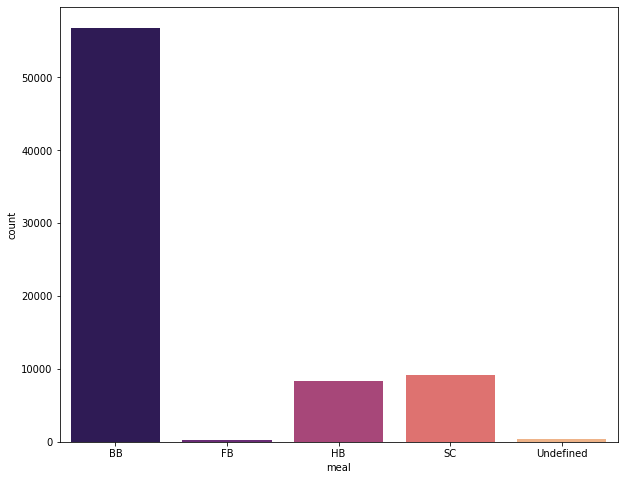

In [191]:
# most preferred meal of customer 
freq_meal = df1["meal"].value_counts()
freq_meal_perc = df1["meal"].value_counts(normalize=True)
print(freq_meal)
print(freq_meal_perc)
# visualizing the meal as per the guests 
plt.figure( figsize=(10, 8))
sns.countplot(x = df1['meal'], palette="magma")
plt.show()

# 75% guests make their booking with Bed-Breakfast (BB) package
# 12% guests choose their room with Half Board (HB) package

market segment responsible for the most frequent booking 

Online TA        51216
Offline TA/TO    13699
Direct            6182
Groups            3338
Corporate          516
Complementary       99
Aviation            24
Name: market_segment, dtype: int64
Online TA        0.682216
Offline TA/TO    0.182462
Direct           0.082347
Groups           0.044463
Corporate        0.006873
Complementary    0.001319
Aviation         0.000320
Name: market_segment, dtype: float64


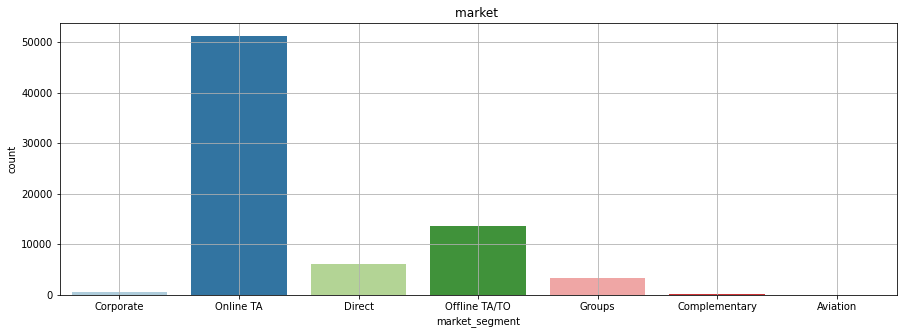

In [192]:
market_seg_value = df1["market_segment"].value_counts()
print(market_seg)

marketseg_by_per = df1["market_segment"].value_counts(normalize=True)
print(marketseg_by_per)


plt.figure(figsize = (15,5))
sns.countplot(data = df1, x = 'market_segment', palette = 'Paired')
plt.title("market ")                                                     
plt.grid(True)
plt.show()

# There are 68% guests book their hotel room through Online Travel Agent and 18% through Offline Travel Agent
# Only 8% guests book their hotel room directly to hotel


Most preffered country for hotel booking

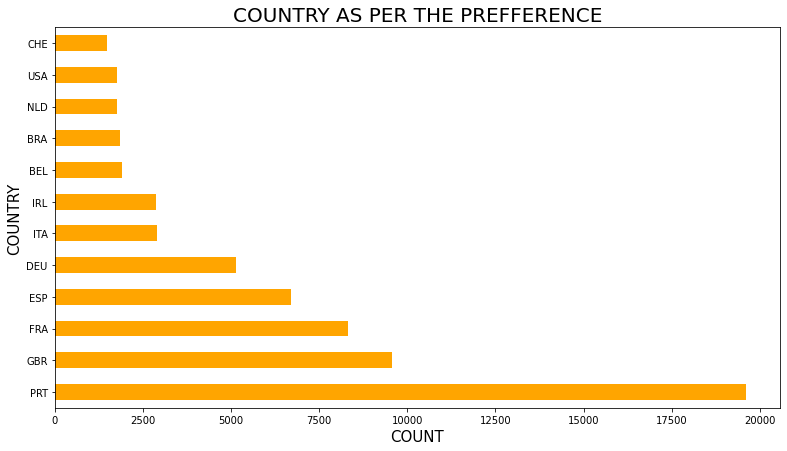

In [195]:
# Prefferences of country by customer for hotel booking.
# As there lots of countries in the data so we will only consider top 12.
preffered_country = df1['country'].value_counts().head(12)
preffered_country

# Plotting the data ragarding most preffered country.
preffered_country.plot(kind = 'barh',color = 'orange',fontsize = 10,figsize=(13,7))
plt.title('COUNTRY AS PER THE PREFFERENCE',fontsize = 20)
plt.xlabel('COUNT',fontsize = 15)
plt.ylabel('COUNTRY',fontsize = 15)
plt.show()

# The bar plot clearly conveys that 'PRT'(Portugal) is the most preffered among all the countries.